**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [7]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [8]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [9]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [10]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [11]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [12]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [15]:
# Answer here
# use the same model but run with my own prompt
input_prompt = ['Explain the difference between classification and clustering in data mining, using simple examples.']
text_response_flash, logs_flash = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
display(Markdown(text_response_flash))
print(f'Token usage(flash-lite):{logs_flash}')

Let's break down the difference between classification and clustering in data mining with simple examples. Think of them as two different ways to organize and understand your data.

## Classification: Putting Things into Pre-defined Boxes

**Classification is like sorting mail into pre-labeled bins.** You already know the categories (the labels) you want to use, and your goal is to assign new items to the correct existing category.

**Key Idea:** You have a set of **labeled data** (examples where you already know the category) to train a model. Then, you use that trained model to predict the category of **new, unlabeled data**.

**Simple Example: Email Spam Detection**

Imagine you have a bunch of emails. You've already gone through some of them and marked them as either "Spam" or "Not Spam."

*   **Labeled Data (Training):**
    *   Email 1: "Win a free iPhone now!" - **Spam**
    *   Email 2: "Meeting reminder for tomorrow" - **Not Spam**
    *   Email 3: "Urgent: Your account needs verification" - **Spam**
    *   Email 4: "Your order has been shipped" - **Not Spam**

*   **The Goal:** To build a system that can automatically decide if a *new* email is spam or not.

*   **The Process:** You feed these labeled emails into a classification algorithm. The algorithm learns patterns associated with spam (e.g., certain keywords, excessive exclamation marks, suspicious links) and patterns associated with legitimate emails.

*   **New, Unlabeled Data:**
    *   Email 5: "Limited time offer: Buy one get one free!"
    *   Email 6: "Hi John, can you send me the report?"

*   **The Output (Classification):** The trained classification model will look at Email 5 and, based on the patterns it learned, likely label it as **Spam**. It will look at Email 6 and likely label it as **Not Spam**.

**Other Examples of Classification:**

*   **Image Recognition:** Training a model to identify if a picture contains a "cat" or a "dog."
*   **Medical Diagnosis:** Predicting if a patient has a "disease" or is "healthy" based on their symptoms.
*   **Credit Risk Assessment:** Deciding if a loan applicant is "high risk" or "low risk."

## Clustering: Discovering Natural Groups

**Clustering is like finding natural groupings in a pile of unsorted objects.** You don't know the categories beforehand. Instead, you let the data itself reveal the underlying structure by grouping similar items together.

**Key Idea:** You have a set of **unlabeled data**. The goal is to find inherent groupings (clusters) within this data based on similarity.

**Simple Example: Customer Segmentation**

Imagine you have data about your customers, including their age, how much they spend, and what products they buy. You don't have pre-defined customer groups.

*   **Unlabeled Data:**
    *   Customer A: Age 25, Spends $50/month, Buys electronics and clothing.
    *   Customer B: Age 60, Spends $200/month, Buys home goods and books.
    *   Customer C: Age 30, Spends $70/month, Buys electronics and gadgets.
    *   Customer D: Age 55, Spends $180/month, Buys books and art supplies.
    *   Customer E: Age 28, Spends $60/month, Buys clothing and accessories.

*   **The Goal:** To discover different types of customers you have, without knowing them in advance.

*   **The Process:** You feed this customer data into a clustering algorithm. The algorithm looks for customers who are similar to each other based on the features (age, spending, product preferences).

*   **The Output (Clustering):** The clustering algorithm might identify groups like:
    *   **Cluster 1 (Young Spenders):** Customers A and E, who are younger and spend moderately on fashion and electronics.
    *   **Cluster 2 (Affluent Seniors):** Customers B and D, who are older and spend more on traditional items like books and home goods.
    *   **Cluster 3 (Tech Enthusiasts):** Customer C, who is younger and heavily invested in electronics.

    You then give these clusters meaningful names (e.g., "Budget Shoppers," "Luxury Buyers," "Gadget Lovers") and can use this understanding for targeted marketing.

**Other Examples of Clustering:**

*   **Document Analysis:** Grouping similar news articles together.
*   **Genetics:** Identifying groups of genes that behave similarly.
*   **Anomaly Detection:** Finding data points that don't fit into any cluster (potential outliers or fraud).

## Key Differences Summarized:

| Feature          | Classification                               | Clustering                                     |
| :--------------- | :------------------------------------------- | :--------------------------------------------- |
| **Goal**         | Predict a pre-defined category for new data. | Discover natural groupings in the data.         |
| **Data Type**    | Requires **labeled** training data.          | Works with **unlabeled** data.                 |
| **Output**       | Assigns data points to known classes.        | Creates new, unknown groups (clusters).        |
| **Supervision**  | **Supervised learning** (uses labels).       | **Unsupervised learning** (no labels needed).  |
| **Analogy**      | Sorting mail into labeled bins.              | Finding natural groups in a pile of objects.   |

In essence, classification is about **predicting** based on what you already know, while clustering is about **discovering** hidden patterns and structures within your data.

Token usage(flash-lite):{'model': 'gemini-2.5-flash-lite', 'input_tokens': 22, 'output_tokens': 1260}


In [23]:
# Answer here
# use the gemini-2.5-pro and run with my own prompt
input_prompt = ['Explain the difference between classification and clustering in data mining, using simple examples.']
text_response_pro, logs_pro = prompt_gemini(
    input_prompt = input_prompt,
    model_name="gemini-2.5-pro",
    with_tokens_info = True)
display(Markdown(text_response_pro))
print(f'Token usage(pro):{logs_pro}')

Of course! Here is an explanation of the difference between classification and clustering, using simple examples and analogies.

### The Core Idea in One Sentence

*   **Classification** is like sorting mail into pre-labeled boxes (e.g., "Bills," "Junk Mail," "Personal").
*   **Clustering** is like taking a pile of unsorted mail and creating your own piles based on similarities (e.g., this pile has windowed envelopes, this pile has glossy flyers).

---

### A Simple Analogy: Sorting Fruit

Imagine you have a big basket of fruit.

**Classification:**
You are given clear instructions: "Sort these fruits into three boxes labeled 'Apples', 'Oranges', and 'Bananas'."

*   You already know the categories (Apples, Oranges, Bananas).
*   You look at each piece of fruit and decide which pre-defined category it belongs to.
*   This is **Classification**. You are assigning items to known labels.



**Clustering:**
You are given no instructions, just the basket of fruit. You are told: "Find groups of similar fruits."

*   You don't have pre-defined categories.
*   You look at the fruits and start making piles based on their properties: "This group is round and red," "this group is long and yellow," "this group is round and orange."
*   You have *discovered* the groups yourself based on similarity (color, shape, size).
*   This is **Clustering**. You are creating groups based on natural patterns in the data.



---

### Key Differences Explained

Here is a table summarizing the main differences:

| Feature | Classification | Clustering |
| :--- | :--- | :--- |
| **Learning Type** | **Supervised Learning** | **Unsupervised Learning** |
| **Input Data** | Data is **labeled** with pre-defined categories. | Data is **unlabeled**; no categories are known beforehand. |
| **Goal** | To **predict** the category/class of a new item. | To **discover** natural groups or patterns in the data. |
| **Process** | The algorithm learns from a "training set" of correctly labeled data. | The algorithm groups data points based on their similarity to each other. |
| **Question it Answers** | "What group does this new item belong to?" | "What natural groups exist in my data?" |

---

### Real-World Examples

#### Example 1: Email Management

*   **Classification: Spam Detection**
    *   **Goal:** To classify an incoming email as either "Spam" or "Not Spam."
    *   **How it works:** The algorithm is trained on thousands of emails that have already been labeled by humans as spam or not spam. It learns the features of spam (e.g., certain words, strange links, sender's address). When a *new* email arrives, it uses this knowledge to predict which category it belongs to.
    *   **The categories ("Spam", "Not Spam") are known in advance.**

*   **Clustering: Grouping Similar Emails**
    *   **Goal:** To automatically group similar emails in your inbox to help you organize them.
    *   **How it works:** The algorithm looks at all your emails (without any labels) and groups them based on content and sender. It might create a cluster of emails from your family, a cluster of promotional emails from online stores, and a cluster for work-related notifications.
    *   **The algorithm discovers these groups on its own; you didn't tell it to look for "family" or "promotions."**

#### Example 2: Customer Data

*   **Classification: Loan Application Approval**
    *   **Goal:** To predict whether a new loan applicant is likely to "Default" or "Not Default" on their loan.
    *   **How it works:** A model is trained on historical data of past applicants, where each applicant is labeled as having defaulted or not. The model learns the characteristics of both groups (e.g., credit score, income, age). When a new person applies, the model predicts their label.
    *   **The categories ("Default", "Not Default") are pre-defined.**

*   **Clustering: Customer Segmentation**
    *   **Goal:** To identify different types of customers for marketing purposes.
    *   **How it works:** The algorithm analyzes a customer database (with information like age, spending habits, location) and groups similar customers together. It might discover groups like "High-Spending Young Professionals," "Budget-Conscious Families," and "Occasional Shoppers."
    *   **These customer segments are discovered from the data, not defined beforehand.** The marketing team can then give these groups names and create targeted campaigns.

### Summary

Think of it as learning with a teacher vs. learning on your own.

*   **Classification (Supervised):** A teacher gives you examples and tells you the correct answers (labeled data). You learn the rules and can then apply them to new problems.
*   **Clustering (Unsupervised):** You are given a set of problems with no answers. You have to look for patterns and similarities yourself to sort them into logical groups.

Token usage(pro):{'model': 'gemini-2.5-pro', 'input_tokens': 22, 'output_tokens': 1130}


In [25]:
# Answer here
# difference between gemini-2.5-flash-lite & gemini-2.5-pro
md_text = """
### Q3. Differences between `gemini-2.5-flash-lite` and `gemini-2.5-pro`

1. **Length and level of detail**
   - `gemini-2.5-flash-lite` produced a slightly longer answer.  
   It gives very detailed explanations for both *classification* and *clustering*, with many concrete examples.
   - `gemini-2.5-pro` generated a somewhat shorter answer,  
   but it is still complete and feels more concise.

2. **Structure and organization**
   - **flash-lite**:  
     Starts directly from a data mining context (e.g., spam detection, customer segmentation),  
     then explains *Classification* and *Clustering* in separate sections, lists more use cases,  
     and ends with a comparison table. The answer reads like a long textbook paragraph.
   - **pro**:  
     Begins with a one-sentence core idea, then uses clear analogies (mail sorting, fruit sorting),  
     followed by a comparison table and a final summary. The structure feels more like a teaching note.

3. **Examples used**
   - Both models use classic examples such as **spam vs. not spam** and **customer segmentation**.
   - `flash-lite` additionally mentions more technical domains  
     (e.g., image recognition, medical diagnosis, genetics), so the coverage is broader.
   - `pro` focuses more on everyday and business-related scenarios,  
     such as loan default prediction and grouping emails, which makes the explanation more intuitive.

4. **Explanatory style**
   - **flash-lite**:  
     The style is closer to a comprehensive technical explanation with many examples.  
     It feels like reading a detailed section of a data mining textbook.
   - **pro**:  
     The style is more didactic and analogy-driven (teacher-like).  
     It explicitly highlights key questions (e.g., *“What group does this item belong to?”* vs.  
     *“What natural groups exist in the data?”*), which helps beginners grasp the main ideas faster.

5. **Overall impression**
   - Conceptually, both models give **consistent and correct definitions** of classification and clustering.  
   - The main differences are in **length, structure, and teaching style**:  
     `gemini-2.5-flash-lite` is more verbose and information-rich,  
     while `gemini-2.5-pro` is more compact, well-structured, and feels more like a guided lesson.
"""

display(Markdown(md_text))


### Q3. Differences between `gemini-2.5-flash-lite` and `gemini-2.5-pro`

1. **Length and level of detail**
   - `gemini-2.5-flash-lite` produced a slightly longer answer.  
   It gives very detailed explanations for both *classification* and *clustering*, with many concrete examples.
   - `gemini-2.5-pro` generated a somewhat shorter answer,  
   but it is still complete and feels more concise.

2. **Structure and organization**
   - **flash-lite**:  
     Starts directly from a data mining context (e.g., spam detection, customer segmentation),  
     then explains *Classification* and *Clustering* in separate sections, lists more use cases,  
     and ends with a comparison table. The answer reads like a long textbook paragraph.
   - **pro**:  
     Begins with a one-sentence core idea, then uses clear analogies (mail sorting, fruit sorting),  
     followed by a comparison table and a final summary. The structure feels more like a teaching note.

3. **Examples used**
   - Both models use classic examples such as **spam vs. not spam** and **customer segmentation**.
   - `flash-lite` additionally mentions more technical domains  
     (e.g., image recognition, medical diagnosis, genetics), so the coverage is broader.
   - `pro` focuses more on everyday and business-related scenarios,  
     such as loan default prediction and grouping emails, which makes the explanation more intuitive.

4. **Explanatory style**
   - **flash-lite**:  
     The style is closer to a comprehensive technical explanation with many examples.  
     It feels like reading a detailed section of a data mining textbook.
   - **pro**:  
     The style is more didactic and analogy-driven (teacher-like).  
     It explicitly highlights key questions (e.g., *“What group does this item belong to?”* vs.  
     *“What natural groups exist in the data?”*), which helps beginners grasp the main ideas faster.

5. **Overall impression**
   - Conceptually, both models give **consistent and correct definitions** of classification and clustering.  
   - The main differences are in **length, structure, and teaching style**:  
     `gemini-2.5-flash-lite` is more verbose and information-rich,  
     while `gemini-2.5-pro` is more compact, well-structured, and feels more like a guided lesson.


In [24]:
# Answer here
# change the system_prompt and discuss the difference between before & after
new_system_prompt = ('You are a strict data mining professor. You will Always answer with clear structure and bullet points,and explain concepts step by step for beginners.')
input_prompt = ['Explain the difference between classification and clustering in data mining, using simple examples.']

text_response_strict, logs_strict = prompt_gemini(
    input_prompt = input_prompt,
    system_instruction = new_system_prompt,
    with_tokens_info=True
)
display(Markdown(text_response_strict))
print(f'Token usage(new system prompt):{logs_strict}')

md_text_q4 = """
### Q4. What happens if we change the system prompt?

- **Tone / role changes**  
  - Original prompt → a friendly assistant using simple analogies.  
  - New prompt → a professor talking to a class (“Alright class, settle down…”).

- **Structure changes**  
  - Original answer → more like an article: analogy → explanation → examples → short table.  
  - New answer → more like lecture notes: clear sections, “What it is”, “Key characteristics”, list of algorithms and summary.

- **Same idea, different style**  
  - Both answers explain the same core idea (classification = supervised, clustering = unsupervised).  
  - The system prompt mainly changes *how* the model talks, not *what* it knows.
"""

display(Markdown(md_text_q4))

Alright class, settle down. Today, we're going to tackle two fundamental concepts in data mining: **Classification** and **Clustering**. While both involve grouping data, their approaches and objectives are distinctly different. Pay close attention, as understanding this distinction is crucial for your future work.

Let's break it down.

### Classification

**What it is:**
Classification is a **supervised learning** technique. This means we have a dataset where we already know the correct "category" or "label" for each data point. The goal of classification is to build a model that can predict the category of *new, unseen* data points based on the patterns learned from the labeled training data.

**Think of it like this:** You're teaching a child to identify different fruits. You show them an apple and say, "This is an apple." You show them a banana and say, "This is a banana." You provide many examples with their correct labels. Eventually, the child learns to identify a new apple they've never seen before as an "apple."

**Key Characteristics:**
*   **Supervised:** Requires labeled training data.
*   **Predictive:** Aims to predict a predefined category for new data.
*   **Known Classes:** The categories (classes) are known beforehand.
*   **Goal:** To assign new data points to one of the existing, known classes.

**Simple Example:**
Imagine you have a dataset of emails, and each email is already labeled as either "Spam" or "Not Spam."

*   **Training Data:** A collection of emails, each with a label:
    *   Email 1: "Buy cheap viagra now!" - **Spam**
    *   Email 2: "Meeting agenda for tomorrow" - **Not Spam**
    *   Email 3: "Win a free iPhone!" - **Spam**
    *   Email 4: "Your order confirmation" - **Not Spam**
*   **The Goal:** To build a model that can look at a *new* email and decide if it's likely to be Spam or Not Spam.
*   **New Data:** A brand new email arrives: "Special discount on all electronics!"
*   **Classification Output:** The model, having learned from the labeled examples, might predict this new email as **Spam**.

**Common Algorithms:**
*   Decision Trees
*   Support Vector Machines (SVM)
*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Naive Bayes

### Clustering

**What it is:**
Clustering is an **unsupervised learning** technique. This means we start with a dataset that has *no predefined labels* or categories. The goal of clustering is to discover inherent groupings or clusters within the data, where data points within the same cluster are more similar to each other than to those in other clusters.

**Think of it like this:** You give a child a box of assorted toys (cars, dolls, blocks) without telling them what they are. The child might naturally start grouping them: putting all the cars together, all the dolls together, and all the blocks together, based on their visual similarities. They are discovering the groups themselves.

**Key Characteristics:**
*   **Unsupervised:** Does not require labeled training data.
*   **Descriptive/Exploratory:** Aims to discover hidden patterns and structures in the data.
*   **Unknown Classes:** The groups (clusters) are not known beforehand; they are discovered.
*   **Goal:** To partition the data into meaningful groups based on similarity.

**Simple Example:**
Imagine you have a dataset of customer purchase histories, but you don't know what types of customers you have.

*   **Training Data:** A collection of customer purchase records (e.g., items bought, frequency of purchase, total spent), *without any labels*.
    *   Customer A: Buys a lot of electronics, high spending.
    *   Customer B: Buys mostly groceries, frequent small purchases.
    *   Customer C: Buys occasional luxury items, very high spending.
    *   Customer D: Buys a mix of electronics and home goods, moderate spending.
    *   Customer E: Buys mostly groceries, frequent small purchases.
*   **The Goal:** To group these customers into distinct segments based on their purchasing behavior.
*   **Clustering Output:** The clustering algorithm might identify three distinct clusters:
    *   **Cluster 1:** Customers like A and D (likely "Tech Enthusiasts" or "General Shoppers").
    *   **Cluster 2:** Customers like B and E (likely "Budget Grocery Shoppers").
    *   **Cluster 3:** Customer C (likely a "Luxury Buyer").
    The algorithm doesn't know these labels beforehand; it just finds the groupings.

**Common Algorithms:**
*   K-Means Clustering
*   Hierarchical Clustering
*   DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
*   Mean-Shift

### Summary Table

| Feature         | Classification                               | Clustering                                     |
| :-------------- | :------------------------------------------- | :--------------------------------------------- |
| **Learning Type** | Supervised                                   | Unsupervised                                   |
| **Input Data**  | Labeled data (features + known class)        | Unlabeled data (features only)                 |
| **Objective**   | Predict the class of new data                | Discover inherent groups (clusters) in data    |
| **Output**      | A model that assigns data to predefined classes | A set of clusters, each containing similar data |
| **Classes**     | Predefined and known                         | Discovered and not known beforehand            |
| **Example**     | Spam detection, image recognition            | Customer segmentation, anomaly detection       |

In essence, classification is about **predicting a known outcome**, while clustering is about **discovering unknown structures**. Both are powerful tools, but they serve different purposes in the data mining process.

Any questions? Don't be shy. This is a foundational concept.

Token usage(new system prompt):{'model': 'gemini-2.5-flash-lite', 'input_tokens': 45, 'output_tokens': 1291}



### Q4. What happens if we change the system prompt?

- **Tone / role changes**  
  - Original prompt → a friendly assistant using simple analogies.  
  - New prompt → a professor talking to a class (“Alright class, settle down…”).

- **Structure changes**  
  - Original answer → more like an article: analogy → explanation → examples → short table.  
  - New answer → more like lecture notes: clear sections, “What it is”, “Key characteristics”, list of algorithms and summary.

- **Same idea, different style**  
  - Both answers explain the same core idea (classification = supervised, clustering = unsupervised).  
  - The system prompt mainly changes *how* the model talks, not *what* it knows.


---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [26]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [27]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [28]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [29]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [ ]:
# Answer here
class FoodItem(BaseModel):
    name: str
    portion: str
    main_ingredient: list[str]
    
class MealAnalysis(BaseModel):
    meal_name: str
    meal_time: str
    total_calories: int
    main_risks: list[str]
    recoomended_changes: list[str]
    items: list[FoodItem]

In [37]:
input_prompt_new = ["""
You are a nutrition assistant.

Analyze the following meals for one person in a single day and return a list of structured analyses.

Day meals:
1) Breakfast: 
   - Ham and cheese sandwich
   - Black coffee with a little sugar

2) Lunch:
   - Fried chicken bento with white rice and stir-fried cabbage
   - One large cup of bubble milk tea with full sugar

3) Dinner:
   - Hotpot with beef, tofu, assorted vegetables, and white rice
   - One can of sugar-sweetened soda

For EACH meal, please:
- Give the meal a short descriptive name
- Identify the meal time (breakfast, lunch, dinner, or snack)
- Roughly estimate the total calories (in kcal)
- Give a health score from 1 to 5 (5 = very healthy)
- List the main health risks as short phrases
- Suggest concrete changes to make the meal healthier
- List each food item with its portion and main ingredients

Return the result as a JSON list of MealAnalysis objects.
"""]

text_response_new = prompt_gemini(input_prompt = input_prompt_new, schema = list[MealAnalysis])
print(text_response_new)    

[
  {
    "meal_name": "Simple Breakfast",
    "meal_time": "breakfast",
    "total_calories": 450,
    "main_risks": [
      "High in saturated fat",
      "Processed meat",
      "Added sugar"
    ],
    "recoomended_changes": [
      "Use whole wheat bread",
      "Choose lean protein like turkey or chicken breast",
      "Reduce or eliminate sugar in coffee"
    ],
    "items": [
      {
        "name": "Ham and cheese sandwich",
        "portion": "1 sandwich",
        "main_ingredient": [
          "Bread",
          "Ham",
          "Cheese"
        ]
      },
      {
        "name": "Black coffee with sugar",
        "portion": "1 cup",
        "main_ingredient": [
          "Coffee",
          "Sugar"
        ]
      }
    ]
  },
  {
    "meal_name": "Fried Chicken Bento",
    "meal_time": "lunch",
    "total_calories": 900,
    "main_risks": [
      "High in unhealthy fats",
      "High in sodium",
      "High in sugar",
      "Refined carbohydrates"
    ],
    "recoomended_c

In [38]:
structured_resp_new = json.loads(text_response_new)
print(structured_resp_new)
print(type(structured_resp_new))

[{'meal_name': 'Simple Breakfast', 'meal_time': 'breakfast', 'total_calories': 450, 'main_risks': ['High in saturated fat', 'Processed meat', 'Added sugar'], 'recoomended_changes': ['Use whole wheat bread', 'Choose lean protein like turkey or chicken breast', 'Reduce or eliminate sugar in coffee'], 'items': [{'name': 'Ham and cheese sandwich', 'portion': '1 sandwich', 'main_ingredient': ['Bread', 'Ham', 'Cheese']}, {'name': 'Black coffee with sugar', 'portion': '1 cup', 'main_ingredient': ['Coffee', 'Sugar']}]}, {'meal_name': 'Fried Chicken Bento', 'meal_time': 'lunch', 'total_calories': 900, 'main_risks': ['High in unhealthy fats', 'High in sodium', 'High in sugar', 'Refined carbohydrates'], 'recoomended_changes': ['Opt for grilled or baked chicken', 'Reduce sugar in bubble tea or choose sugar-free options', 'Increase vegetable portion', 'Choose brown rice'], 'items': [{'name': 'Fried chicken bento', 'portion': '1 bento box', 'main_ingredient': ['Chicken', 'Rice', 'Cabbage', 'Oil']}, 

In [41]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for meal in structured_resp_new:
    print(meal["meal_name"], "\n")
    print("\t", "Meal Time:", meal["meal_time"], "\n")
    print("\t", "Total Calories:", meal["total_calories"],"kcal", "\n")
    print("\t", "Main Risks:", meal["main_risks"], "\n")
    print("\t", "Recommended Changes:", meal["recoomended_changes"], "\n")
    print("\t", "Food Items:")
    for item in meal["items"]:
        print("\t", item["name"], "-", item["portion"], ":", item["main_ingredient"], "\n")

Simple Breakfast 

	 Meal Time: breakfast 

	 Total Calories: 450 kcal 

	 Main Risks: ['High in saturated fat', 'Processed meat', 'Added sugar'] 

	 Recommended Changes: ['Use whole wheat bread', 'Choose lean protein like turkey or chicken breast', 'Reduce or eliminate sugar in coffee'] 

	 Food Items:
	 Ham and cheese sandwich - 1 sandwich : ['Bread', 'Ham', 'Cheese'] 

	 Black coffee with sugar - 1 cup : ['Coffee', 'Sugar'] 

Fried Chicken Bento 

	 Meal Time: lunch 

	 Total Calories: 900 kcal 

	 Main Risks: ['High in unhealthy fats', 'High in sodium', 'High in sugar', 'Refined carbohydrates'] 

	 Recommended Changes: ['Opt for grilled or baked chicken', 'Reduce sugar in bubble tea or choose sugar-free options', 'Increase vegetable portion', 'Choose brown rice'] 

	 Food Items:
	 Fried chicken bento - 1 bento box : ['Chicken', 'Rice', 'Cabbage', 'Oil'] 

	 Bubble milk tea - 1 large cup : ['Milk', 'Tea', 'Tapioca pearls', 'Sugar'] 

Hotpot Feast 

	 Meal Time: dinner 

	 Total Calo

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [42]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [43]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [44]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [45]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [48]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to review_extraction_example.jsonl: 1 docs [00:00, 333.20 docs/s]

✓ Saved 1 documents to review_extraction_example.jsonl



LangExtract: Loading review_extraction_example.jsonl: 100%|██████████| 8.58k/8.58k [00:00<00:00, 11.0MB/s]

✓ Loaded 1 documents from review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [46]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [ ]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [57]:
# Answer here
import pymupdf

pdf_path = "/Users/chinnngz/Documents/labs/DM2025Labs/DM2025-Lab2-Exercise/data/documents/The Devil Wears Prada.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    for i, page in enumerate(doc):
        text = page.get_text("text")
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

print("\n", formatted_text)


✓ Extracted text from '/Users/chinnngz/Documents/labs/DM2025Labs/DM2025-Lab2-Exercise/data/documents/The Devil Wears Prada.pdf'

 **Page 1**
"""
This isn’t my usual cup of tea but I decided to give it a chance because it was referenced in an 
episode of The Office. In fact, I think it was referenced in two episodes and that’s when my 
curiosity was piqued. I wasn’t expecting much, but I came away with a bundle of conflicting 
thoughts in my head which I think is the mark of some sort of success. At the very least, I was 
entertained. 
The first thing I want to say is that Emily Blunt completely stole the show here. Meryl Streep is 
going to do Meryl Streep, and Anne Hathaway’s character is fairly straightforward, but I was 
astonished at how convincingly Blunt was able to play bitchy, snarky and condescending, all 
while saying thoroughly entertaining lines. Any scene she was in made me light up, and I was 
sad when she basically disappeared in the final act. 
Now, to the themes of thi

In [ ]:
# answer here
prompt_new = textwrap.dedent("""\
    You are extracting structured information from movie reviews.

    TASK:
    From the review text, extract:
    1) Explicit opinions about elements of the film.
    2) Descriptions of how the film affects the viewer or audience.

    OUTPUT FORMAT:
    - You must output a list of extractions.
    - Each extraction must have:
      - extraction_class: either "opinion_statement" or "audience_impact" (no other values).
      - extraction_text: a contiguous span of text copied verbatim from the input.
      - attributes: a dictionary with the fields defined below.

    IMPORTANT CONSTRAINTS:
    - extraction_text MUST be copied exactly from the review. Do not paraphrase or rewrite.
    - extraction_text MUST be a continuous substring (no skipping words).
    - Do NOT create overlapping spans: the same exact text span should not be used for more than one extraction.
    - Extract entities in order of appearance in the text.

    CLASS 1: "opinion_statement"
    Use this class for direct judgments about film elements (e.g., plot, score, acting, pacing, visuals).
    Attributes:
      - subject (str): the element being reviewed (e.g., "The plot", "The acting").
      - sentiment (str): one of ["Positive", "Negative", "Neutral"].
      - key_phrase (str): the core descriptive words that express the judgment (e.g., "truly clever", "clunky and unnatural").

    CLASS 2: "audience_impact"
    Use this class for phrases describing the effect on the viewer or audience.
    Attributes:
      - emotion_evoked (list[str]): feelings or reactions (e.g., ["stressed"], ["joyful", "excited"], ["confused"]).
      - causal_element (str): what part of the film caused the reaction (e.g., "The soundtrack", "the slow pacing").
      - target_audience (str): who was affected (e.g., "the audience", "the reviewer", "some viewers").
    """)
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    ),
    # Example 3: Neutral opinion and a mild audience reaction
    lx.data.ExampleData(
        text="The acting is competent but nothing groundbreaking, and the slow pacing may leave some viewers indifferent.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="The acting is competent but nothing groundbreaking",
                attributes={
                    "subject": "The acting",
                    "sentiment": "Neutral",
                    "key_phrase": "competent but nothing groundbreaking"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="may leave some viewers indifferent",
                attributes={
                    "emotion_evoked": ["indifferent"],
                    "causal_element": "the slow pacing",
                    "target_audience": "some viewers"
                }
            )
        ]
    )
]


In [73]:
# answer here
html_inception = grounded_info_extraction(
    input_documents=formatted_text,
    prompt=prompt_new,
    examples=examples,
    file_name="inception_review_new",
    model_id="gemini-2.5-flash-lite",
    extraction_passes=1,
    max_workers=3,
    max_char_buffer=2000
)


Extracted 28 entities:

• opinion_statement: 'Emily Blunt completely stole the show here'
  - subject: Emily Blunt's performance
  - sentiment: Positive
  - key_phrase: completely stole the show
• audience_impact: 'Any scene she was in made me light up'
  - emotion_evoked: ['happy', 'entertained']
  - causal_element: Emily Blunt's scenes
  - target_audience: the reviewer
• opinion_statement: 'astonished at how convincingly Blunt was able to play bitchy, snarky and condescending'
  - subject: Emily Blunt's performance
  - sentiment: Positive
  - key_phrase: convincingly play bitchy, snarky and condescending
• opinion_statement: 'thoroughly entertaining lines'
  - subject: The lines
  - sentiment: Positive
  - key_phrase: thoroughly entertaining
• opinion_statement: 'Anne Hathaway’s character Andrea doesn’t care about fashion at all - much like myself, so she was easy to relate to'
  - subject: Andrea's character
  - sentiment: Positive
  - key_phrase: easy to relate to
• opinion_stateme

LangExtract: Saving to inception_review_new.jsonl: 1 docs [00:00, 283.67 docs/s]

✓ Saved 1 documents to inception_review_new.jsonl



LangExtract: Loading inception_review_new.jsonl: 100%|██████████| 18.2k/18.2k [00:00<00:00, 35.7MB/s]

✓ Loaded 1 documents from inception_review_new.jsonl
✓ Visualization saved to ./results/info_extractions/inception_review_new_vis.html


In [74]:
# answer here
with open("./results/info_extractions/inception_review_new.jsonl", "r") as f:
    content_extracted_raw_new = json.load(f)
content_extracted_raw_new

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'Emily Blunt completely stole the show here',
   'char_interval': {'start_pos': 449, 'end_pos': 491},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': "Emily Blunt's performance",
    'sentiment': 'Positive',
    'key_phrase': 'completely stole the show'}},
  {'extraction_class': 'audience_impact',
   'extraction_text': 'Any scene she was in made me light up',
   'char_interval': {'start_pos': 741, 'end_pos': 778},
   'alignment_status': 'match_fuzzy',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'emotion_evoked': ['happy', 'entertained'],
    'causal_element': "Emily Blunt's scenes",
    'target_audience': 'the reviewer'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'astonished at how convincingly Blunt was able to play bitchy, snarky and condescending

In [ ]:
html_content

In [75]:
# answer here
'''**Discussion of extraction quality and possible improvements**

Overall, the structured extraction with `langextract` worked quite well on my new movie review. The model was able to correctly distinguish between `opinion_statement` and `audience_impact` in most cases. For example, sentences like *"Emily Blunt completely stole the show here"* were classified as `opinion_statement` with an appropriate `subject` and `key_phrase`, while phrases such as *"Any scene she was in made me light up"* were captured as `audience_impact` with reasonable `emotion_evoked` and `causal_element` values. The extracted attributes are interpretable and could be directly used for downstream analysis (e.g., aggregating sentiments by character or by film element).

However, there are still some issues. In a few cases, the model produced overlapping spans, even though the prompt explicitly asked to avoid them. For instance, *"Emily Blunt’s character made me laugh a ton"* was extracted both as an `opinion_statement` and as an `audience_impact` with the same core phrase *"made me laugh a ton"*. This kind of duplication suggests that the model has difficulty separating the evaluative part of the sentence from the audience reaction when they are tightly coupled. In addition, some `key_phrase` fields could be more precise, for example by including strong emotional qualifiers such as "astonished" or "bitterly" when they are present in the sentence.

According to the `langextract` documentation, there are several options that could be used to improve the results which I have not tried yet. First, I could add more diverse examples, especially for borderline or mixed cases (e.g. sentences where opinion and impact are expressed together, or truly neutral comments). Second, I could experiment with multiple `extraction_passes` and a non-zero temperature to increase recall on long reviews. Third, I could try a stronger model such as `gemini-2.5-pro` to see if it handles subtle sentiment and sarcasm better. Finally, I could further refine the prompt to explicitly state how to handle sentences that contain both an opinion and an audience reaction, and to enforce non-overlapping spans more strictly. These adjustments would likely lead to more consistent and higher-quality extractions.
'''

'**Discussion of extraction quality and possible improvements**\n\nOverall, the structured extraction with `langextract` worked quite well on my new movie review. The model was able to correctly distinguish between `opinion_statement` and `audience_impact` in most cases. For example, sentences like *"Emily Blunt completely stole the show here"* were classified as `opinion_statement` with an appropriate `subject` and `key_phrase`, while phrases such as *"Any scene she was in made me light up"* were captured as `audience_impact` with reasonable `emotion_evoked` and `causal_element` values. The extracted attributes are interpretable and could be directly used for downstream analysis (e.g., aggregating sentiments by character or by film element).\n\nHowever, there are still some issues. In a few cases, the model produced overlapping spans, even though the prompt explicitly asked to avoid them. For instance, *"Emily Blunt’s character made me laugh a ton"* was extracted both as an `opinion_s

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [81]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [82]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_74188/2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_74188/2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [83]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [84]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [85]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [86]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [87]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [88]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
6,10006,When you've still got a whole season of Wentwo...,anger,0.875,"[values=[-0.026256418, 0.013921868, -0.0427987...","[-0.026256418, 0.013921868, -0.042798772, -0.0..."
268,10268,"im on holiday for the next round, fuming!",anger,0.562,"[values=[0.019507078, 0.002723433, -0.02016623...","[0.019507078, 0.002723433, -0.020166233, -0.07..."
724,10724,@TDsNation i watch all your videos but i like ...,anger,0.333,"[values=[-0.01601597, -0.0011301321, 0.0190971...","[-0.01601597, -0.0011301321, 0.019097181, -0.0..."
316,10316,I've always had a weird grudge against stingra...,anger,0.542,"[values=[-0.0008429582, 0.008679095, 0.0236592...","[-0.0008429582, 0.008679095, 0.02365929, -0.06..."
225,10225,"How can I tell Happy Anniversary, when u are n...",anger,0.604,"[values=[-0.038707748, 0.0014853125, -0.020467...","[-0.038707748, 0.0014853125, -0.020467658, -0...."
...,...,...,...,...,...,...
3505,40678,@emorottie true sonicsatam was serious and a b...,sadness,0.271,"[values=[0.012907331, 0.0023251092, 0.00417853...","[0.012907331, 0.0023251092, 0.00417853, -0.076..."
3308,40481,Like keep grinding boy your life can change in...,sadness,0.417,"[values=[0.011856818, 0.010338525, 0.007891877...","[0.011856818, 0.010338525, 0.007891877, -0.054..."
3180,40353,"Everything is far away because time is short, ...",sadness,0.521,"[values=[-0.014770622, -0.00057607197, 0.00746...","[-0.014770622, -0.00057607197, 0.00746883, -0...."
3385,40558,I'm too sober time to get shit faced,sadness,0.360,"[values=[-0.020733666, -0.005211618, -0.023803...","[-0.020733666, -0.005211618, -0.02380314, -0.0..."


In [89]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
269,30898,@r0Ils ppl get triggered over u smiling they'r...,joy,0.170,"[values=[-0.0058842055, 0.012170943, -0.017462...","[-0.0058842055, 0.012170943, -0.017462442, -0...."
150,21213,I don't want speak front to him #nopanicattack,fear,0.720,"[values=[-0.00043321855, -0.031100117, 0.01061...","[-0.00043321855, -0.031100117, 0.010617052, -0..."
54,10911,Having a baby born too soon is #lifechanging 6...,anger,0.354,"[values=[-0.026022512, 0.000625749, -0.0155184...","[-0.026022512, 0.000625749, -0.015518423, -0.0..."
258,30887,[Moment of levity on the B41] Baby: I want ISI...,joy,0.521,"[values=[-0.0424127, 0.017318571, -0.019188805...","[-0.0424127, 0.017318571, -0.019188805, -0.061..."
41,10898,"Realest ever, relentless ever, inevitable that...",anger,0.415,"[values=[-0.014525433, 0.01642175, 0.010939563...","[-0.014525433, 0.01642175, 0.010939563, -0.071..."
329,40842,Don't be disheartened if you didn't get the ca...,sadness,0.438,"[values=[0.014799686, 0.026640678, -0.00012501...","[0.014799686, 0.026640678, -0.00012501857, -0...."
173,21236,Bout ta get my @dontbreathe on up in here! @Wa...,fear,0.688,"[values=[-0.01897632, -0.0027345729, -0.003509...","[-0.01897632, -0.0027345729, -0.003509044, -0...."
335,40848,It's basically a dead skin peel which sounds g...,sadness,0.354,"[values=[0.026134387, 0.0031602613, -0.0021065...","[0.026134387, 0.0031602613, -0.0021065692, -0...."
267,30896,It feels good to get outside for a minute and ...,joy,0.708,"[values=[-0.009077298, -0.00353596, -0.0197640...","[-0.009077298, -0.00353596, -0.019764088, -0.0..."
11,10868,@DailyMirror i love how theres no outrage that...,anger,0.726,"[values=[-0.020602157, 0.004117812, 0.00657562...","[-0.020602157, 0.004117812, 0.006575624, -0.06..."


In [90]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [91]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [92]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [93]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

/Users/chinnngz/Documents/labs/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [98]:
# Answer here
# 3D graph
reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=28) 
embedding_3d = reducer_3d.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3d['emotion'] = combined_df['emotion']
df_plot_3d['intensity'] = combined_df['intensity']
df_plot_3d['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig_3d = px.scatter_3d(
    df_plot_3d,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='3D UMAP Projection of Text Embeddings'
)

fig_3d.show()
#  differences and similatities with the 2D graph
"""**Comparison between the 2D and 3D UMAP projections**

The 3D UMAP projection is computed from exactly the same Gemini embeddings as the 2D plot, so the global structure is consistent across both views: points with the same emotion label still tend to form loose clusters, and the three negative emotions (anger, fear, sadness) overlap more with one another than with joy.

The main advantage of the 3D view is that it can be explored interactively. By rotating the plot, some regions that look heavily overlapped in 2D become easier to separate along the UMAP3 axis. For example, small groups of *joy* and *sadness* sentences that appear mixed in the 2D projection can be seen at slightly different depths in 3D, and a few *anger* samples occupy more distinct regions when viewed from certain angles.

On the other hand, the 2D projection is more compact and easier to read at a glance, because all points lie on a plane and there is no depth to interpret. In practice, the 2D UMAP is useful for quick inspection of the overall emotional structure, while the interactive 3D UMAP provides a richer view that can reveal additional separation when we rotate and zoom into specific areas of the embedding space.
"""

/Users/chinnngz/Documents/labs/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



'**Comparison between the 2D and 3D UMAP projections**\n\nThe 3D UMAP projection is computed from exactly the same Gemini embeddings as the 2D plot, so the global structure is consistent across both views: points with the same emotion label still tend to form loose clusters, and the three negative emotions (anger, fear, sadness) overlap more with one another than with joy.\n\nThe main advantage of the 3D view is that it can be explored interactively. By rotating the plot, some regions that look heavily overlapped in 2D become easier to separate along the UMAP3 axis. For example, small groups of *joy* and *sadness* sentences that appear mixed in the 2D projection can be seen at slightly different depths in 3D, and a few *anger* samples occupy more distinct regions when viewed from certain angles.\n\nOn the other hand, the 2D projection is more compact and easier to read at a glance, because all points lie on a plane and there is no depth to interpret. In practice, the 2D UMAP is useful 

---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [99]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [100]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

E0000 00:00:1763905626.729945 3311621 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1763905626.830802 3311621 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 190}


The key challenges in realizing AGI's full potential stem from its fundamental requirements and the ethical considerations surrounding its development. These include:

*   **Learning from Diverse Data:** Unlike narrow AI, which is trained on structured data, AGI needs to learn from a wide variety of unstructured data sources.
*   **Computational Power:** The sheer amount of computational resources needed to process and learn from these vast and diverse datasets presents a significant hurdle.
*   **Ethical Concerns:** Developing AGI responsibly requires addressing critical ethical issues such as:
    *   **Bias and Fairness:** Ensuring algorithms are unbiased and treat everyone equally by training on diverse datasets and continuously monitoring performance.
    *   **Privacy:** Prioritizing user data protection through robust privacy measures and transparent data usage policies.
    *   **Accountability:** Establishing clear guidelines and legal frameworks to determine responsibility for decisions made by AGI systems and address any harm caused.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [103]:
# Answer here
url_new="https://www.decisionfoundry.com/tableau-consulting/articles/tableau-versus-power-bi-comprehensive-comparison/"
# Create the retriever
retriever_new = load_and_retrieve_docs(url_new)

# Use the RAG chain
result_new = rag_chain(question="According to this article, what are the main differences between Power BI and Tableau?", retriever=retriever_new)
display(Markdown(result_new))

E0000 00:00:1763912405.758823 3311621 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1763912405.759423 3311621 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 627, 'output_tokens': 301}


Based on the article, the main differences between Power BI and Tableau are:

*   **User Experience and Interface:**
    *   **Tableau:** Prioritizes visual exploration with an intuitive canvas, encouraging organic insight discovery. It handles complex visualizations well but can be daunting for newcomers due to its depth.
    *   **Power BI:** Adopts Microsoft's familiar design language with ribbon-based navigation and integrated workflows, leading to faster adoption, especially in Microsoft-centric organizations.

*   **Handling of Data and Performance:**
    *   **Tableau:** Is favored for its handling of large datasets and advanced customization.
    *   **Power BI:** Excels at processing large datasets while maintaining responsive performance.

*   **Integration:**
    *   **Power BI:** Boasts seamless integration with Microsoft products.

*   **Pricing and Budget:**
    *   **Power BI:** Offers a more budget-friendly pricing model, including a free version, making it appealing for individuals and small to medium-sized businesses.
    *   **Tableau:** Is generally more expensive and might be better suited for larger companies with specific needs and bigger budgets.

*   **Ease of Use for Beginners:**
    *   **Power BI:** Is considered easier for beginners, allowing them to create simple visualizations and reports without prior experience.
    *   **Tableau:** Has more advanced features, which may require a longer learning curve for new users.

In [105]:
# answer here
# Discuss how good the question was answered by the model, if the model missed important information related to your question.
"""Question I asked:
According to this article, what are the main differences between Power BI and Tableau?

Evaluation of the RAG answer:
The RAG system gave a reasonably good high-level summary. It correctly mentioned differences in user interface, integration with the Microsoft ecosystem, pricing, and learning curve, which are all consistent with the article.

However, the answer missed some detailed comparison points, such as more specific differences in advanced analytics/visualization features, collaboration and sharing, security/governance, and community/support.

Overall, the answer is mostly accurate but incomplete. It captures the main ideas but not all important details. To improve it, I could increase the number of retrieved chunks or ask more focused questions about specific aspects (e.g., pricing only, or analytics features only).
"""


'Question I asked:\nAccording to this article, what are the main differences between Power BI and Tableau?\n\nEvaluation of the RAG answer:\nThe RAG system gave a reasonably good high-level summary. It correctly mentioned differences in user interface, integration with the Microsoft ecosystem, pricing, and learning curve, which are all consistent with the article.\n\nHowever, the answer missed some detailed comparison points, such as more specific differences in advanced analytics/visualization features, collaboration and sharing, security/governance, and community/support.\n\nOverall, the answer is mostly accurate but incomplete. It captures the main ideas but not all important details. To improve it, I could increase the number of retrieved chunks or ask more focused questions about specific aspects (e.g., pricing only, or analytics features only).\n'

##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![11.40.57.png](pics/11.40.57.png)
![11.52.28.png](pics/11.52.28.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![11.48.07.png](pics/11.48.07.png)

source: https://www.decisionfoundry.com/tableau-consulting/articles/tableau-versus-power-bi-comprehensive-comparison/

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:08<00:02,  1.78it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.12 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:06<00:06,  1.50it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.89 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:10,  1.44it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.56 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.77 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:04,  1.22it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.32 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:53<00:00,  5.66s/it]



Results saved to ./llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 50.00%
              precision    recall  f1-score   support

       anger       0.50      0.60      0.55        20
        fear       0.75      0.15      0.25        20
         joy       0.44      0.85      0.58        20
     sadness       0.62      0.40      0.48        20

    accuracy                           0.50        80
   macro avg       0.58      0.50      0.46        80
weighted avg       0.58      0.50      0.46        80



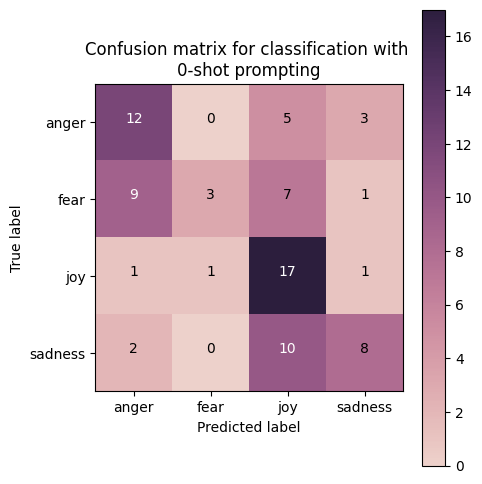

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Wont use using @mothercareuk @Mothercarehelp again!! These guys cant get nothing right!! #fuming
Class: anger

Text: Do you think humans have the sense for recognizing impending doom? 
Class: fear

Text: My future must be bright af.
Class: joy

Text: @LazyBoiSam blues... blues? 🤔
Class: sadness




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:12<00:03,  1.33it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.89 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:07,  1.42it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.28 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:08,  1.69it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.92 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:11<00:03,  1.38it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.24 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:03<00:00,  3.18s/it]



Results saved to ./llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 55.00%
              precision    recall  f1-score   support

       anger       0.52      0.60      0.56        20
        fear       0.71      0.25      0.37        20
         joy       0.56      0.75      0.64        20
     sadness       0.52      0.60      0.56        20

    accuracy                           0.55        80
   macro avg       0.58      0.55      0.53        80
weighted avg       0.58      0.55      0.53        80



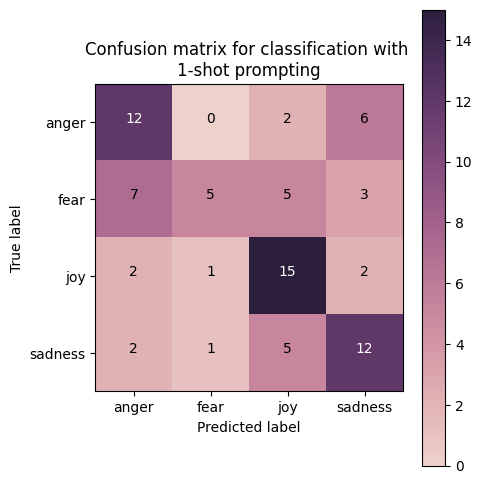

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Wont use using @mothercareuk @Mothercarehelp again!! These guys cant get nothing right!! #fuming
Class: anger

Text: If you be #angry, which may be the case, &amp; which may be unavoidable, see that the sudden excitement does not become sin. #AlbertBarnes
Class: anger

Text: @cc_yandian @HillaryClinton her team must draw from a hat for daily personality #drugged  #yeller #quiet #screamer #😂😂
Class: anger

Text: I believe women are more fiery because once a month they go through struggle and struggle is what develops a strong character.
Class: anger

Text: I don't mean to offend anyone, but 93.7 literally blames everything on white people. In some cases it's true, but a lot of times, it's not
Class: anger

Text: Do you think humans have the sense for recognizing impending doom? 
Class: fear


Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:11<00:03,  1.28it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.21 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:07,  1.31it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.51 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:11,  1.35it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.74 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.22 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:04,  1.09it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.81 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:51<00:00,  5.59s/it]



Results saved to ./llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 56.25%
              precision    recall  f1-score   support

       anger       0.56      0.70      0.62        20
        fear       0.67      0.20      0.31        20
         joy       0.62      0.65      0.63        20
     sadness       0.50      0.70      0.58        20

    accuracy                           0.56        80
   macro avg       0.59      0.56      0.54        80
weighted avg       0.59      0.56      0.54        80



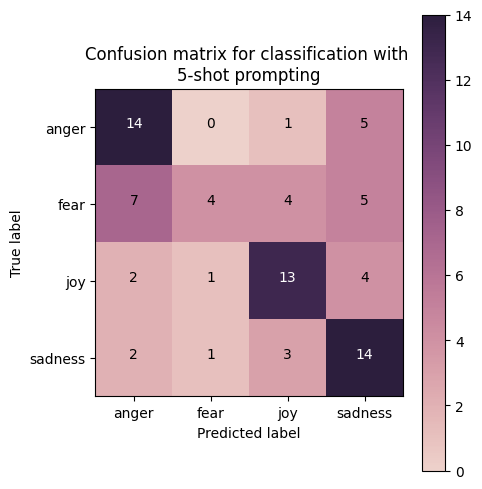

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
"""Evaluated three prompting setups (20 test samples per emotion, 80 in total):

- Zero-shot   : Accuracy ≈ 50%, macro F1 ≈ 0.46
- 1-shot      : Accuracy ≈ 55%, macro F1 ≈ 0.53
- 5-shot      : Accuracy ≈ 56.25%, macro F1 ≈ 0.54

Overall, few-shot prompting clearly improves performance compared to zero-shot,
but the gain from 1-shot to 5-shot is relatively small (diminishing returns).

Per-class behavior:

- Anger:
  Recall stays around 0.60 in zero-/1-shot and increases to 0.70 in 5-shot.
  The model becomes more consistent at recognizing anger.

- Joy:
  In zero-shot, recall is very high (0.85) but joy is over-predicted:
  many non-joy texts (especially sadness) are labeled as joy.
  With 1-shot and 5-shot, recall drops slightly while precision and F1 improve,
  meaning the model uses the "joy" label more carefully.

- Sadness:
  Recall improves steadily from 0.40 (zero-shot) → 0.60 (1-shot) → 0.70 (5-shot.
  Few-shot examples are particularly helpful for distinguishing sadness from joy.

- Fear:
  Fear remains the hardest class. Recall is low in all settings
  (≈0.15 → 0.25 → 0.20 for 0-/1-/5-shot), and many fear texts are misclassified
  as anger, joy, or sadness. Additional examples help a bit, but do not fully
  resolve this class confusion.

In summary, few-shot prompting mainly helps to calibrate the label usage and
reduce biases seen in the zero-shot setting (e.g., overuse of "joy" and
underuse of "fear"). However, some emotions such as fear are intrinsically more
ambiguous, so simply adding more examples yields limited additional benefits.
"""


'\nWe evaluated three prompting setups (20 test samples per emotion, 80 in total):\n\n- Zero-shot   : Accuracy ≈ 50%, macro F1 ≈ 0.46\n- 1-shot      : Accuracy ≈ 55%, macro F1 ≈ 0.53\n- 5-shot      : Accuracy ≈ 56.25%, macro F1 ≈ 0.54\n\nOverall, few-shot prompting clearly improves performance compared to zero-shot,\nbut the gain from 1-shot to 5-shot is relatively small (diminishing returns).\n\nPer-class behavior:\n\n- Anger:\n  Recall stays around 0.60 in zero-/1-shot and increases to 0.70 in 5-shot.\n  The model becomes more consistent at recognizing anger.\n\n- Joy:\n  In zero-shot, recall is very high (0.85) but joy is over-predicted:\n  many non-joy texts (especially sadness) are labeled as joy.\n  With 1-shot and 5-shot, recall drops slightly while precision and F1 improve,\n  meaning the model uses the "joy" label more carefully.\n\n- Sadness:\n  Recall improves steadily from 0.40 (zero-shot) → 0.60 (1-shot) → 0.70 (5-shot.\n  Few-shot examples are particularly helpful for dis

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [107]:
# Answer here
import pandas as pd
import os

base = "./results/llm_classification_results"

# 1. 讀入三個結果檔
df0 = pd.read_csv(os.path.join(base, "results_samples_20_shots_0.csv")).rename(
    columns={"predicted_emotion": "pred0"}
)
df1 = pd.read_csv(os.path.join(base, "results_samples_20_shots_1.csv")).rename(
    columns={"predicted_emotion": "pred1"}
)
df5 = pd.read_csv(os.path.join(base, "results_samples_20_shots_5.csv")).rename(
    columns={"predicted_emotion": "pred5"}
)

# 2. 以 text + true_emotion 對齊三個結果
df = (
    df0
    .merge(df1[["text", "true_emotion", "pred1"]], on=["text", "true_emotion"])
    .merge(df5[["text", "true_emotion", "pred5"]], on=["text", "true_emotion"])
)

# 3. 建立「是否預測正確」欄位
df["correct_0"] = df["pred0"] == df["true_emotion"]
df["correct_1"] = df["pred1"] == df["true_emotion"]
df["correct_5"] = df["pred5"] == df["true_emotion"]

# 4. 三種情況的篩選條件
# (1) 有進步：0-shot 錯，但 1-shot 或 5-shot 變對
improved_mask = (~df["correct_0"]) & (df["correct_1"] | df["correct_5"])
improved_df = df[improved_mask]

# (2) 沒進步：三種設定都錯
no_improve_mask = (~df["correct_0"]) & (~df["correct_1"]) & (~df["correct_5"])
no_improve_df = df[no_improve_mask]

# (3) 變糟：從「對」變成「錯」
# 這裡拆成兩種情況方便觀察
worse_0_to_1_mask = df["correct_0"] & (~df["correct_1"])
worse_1_to_5_mask = df["correct_1"] & (~df["correct_5"])

worse_0_to_1_df = df[worse_0_to_1_mask]
worse_1_to_5_df = df[worse_1_to_5_mask]

print("有進步的句子數量:", len(improved_df))
print("完全沒進步的句子數量:", len(no_improve_df))
print("0-shot 對 → 1-shot 錯 的句子數量:", len(worse_0_to_1_df))
print("1-shot 對 → 5-shot 錯 的句子數量:", len(worse_1_to_5_df))

# 看幾個代表性的例子
print("\n[有進步] 範例：")
display(improved_df[["text", "true_emotion", "pred0", "pred1", "pred5"]].head())

print("\n[沒進步] 範例：")
display(no_improve_df[["text", "true_emotion", "pred0", "pred1", "pred5"]].head())

print("\n[變糟 0→1] 範例：")
display(worse_0_to_1_df[["text", "true_emotion", "pred0", "pred1", "pred5"]])

print("\n[變糟 1→5] 範例：")
display(worse_1_to_5_df[["text", "true_emotion", "pred0", "pred1", "pred5"]])


有進步的句子數量: 11
完全沒進步的句子數量: 29
0-shot 對 → 1-shot 錯 的句子數量: 3
1-shot 對 → 5-shot 錯 的句子數量: 3

[有進步] 範例：


,text,true_emotion,pred0,pred1,pred5
0,@CozanGaming that's what lisa asked before she...,anger,joy,sadness,anger
5,@TrussElise Obama must be fuming.. lol,anger,joy,anger,anger
8,@Jen_ny69 People will always get offended ever...,anger,joy,joy,anger
26,Trying to book holiday flights on @britishairw...,fear,anger,fear,fear
32,Trying to book holiday flights on @britishairw...,fear,anger,fear,sadness



[沒進步] 範例：


,text,true_emotion,pred0,pred1,pred5
7,Me being on my dean really saving a lot of ppl...,anger,sadness,sadness,sadness
10,"Kik to trade, have fun or a conversation (kik...",anger,joy,joy,joy
11,Might just leave and aggravate bae,anger,sadness,sadness,sadness
16,@MaddenFreestyle i turn the game on wanting to...,anger,sadness,sadness,sadness
17,Having a baby born too soon is #lifechanging 6...,anger,joy,sadness,sadness



[變糟 0→1] 範例：


,text,true_emotion,pred0,pred1,pred5
2,"[ @HedgehogDylan ] *she would frown a bit, fol...",anger,anger,sadness,sadness
50,@diehimbeertonis She developed her 'forced smi...,joy,joy,sadness,sadness
57,@airtelindia have some issues with my broadban...,joy,joy,anger,anger



[變糟 1→5] 範例：


,text,true_emotion,pred0,pred1,pred5
32,Trying to book holiday flights on @britishairw...,fear,anger,fear,sadness
47,Dolores.' A thin lipped smile graced glossed l...,joy,joy,joy,sadness
48,"@theclobra lol I thought maybe, couldn't decid...",joy,joy,joy,sadness


In [108]:
# answer here
# Short case study over 0/1/5-shot results
"""Merged the three result files by `text` and `true_emotion` and compared
the predictions of 0-shot, 1-shot and 5-shot prompting.

Counts:
- Improved (0-shot wrong, 1-shot or 5-shot correct): 11 texts
- No improvement (always wrong in 0/1/5-shot): 29 texts
- Got worse 0→1 (correct in 0-shot, wrong in 1-shot): 3 texts
- Got worse 1→5 (correct in 1-shot, wrong in 5-shot): 3 texts

Improved cases:
- Typical pattern: 0-shot predicts "joy" for messages that are actually
  angry or fearful (e.g. jokes with "lol" but strong negative words).
  With few-shot examples, the model better distinguishes anger/fear
  from superficially positive tone, so the label becomes correct.

No improvement:
- Many of these texts are ambiguous or have noisy labels
  (e.g. content that looks joyful but is labeled as anger, or very short,
  slang-heavy messages). In such cases, adding examples does not fix
  the mismatch between label and wording.

Got worse:
- Some texts are correct in 0-shot or 1-shot but flipped after adding
  examples (e.g. joy → sadness, anger → sadness). This suggests the
  few-shot examples bias the model toward certain patterns and sometimes
  over-correct its original intuition.

Few-shot prompting can clearly help some samples, especially reducing the
overuse of "joy" and clarifying negative emotions, but it does not help
all cases and can occasionally hurt. The effect strongly depends on the
quality and balance of the provided examples.
"""


'Merged the three result files by `text` and `true_emotion` and compared\nthe predictions of 0-shot, 1-shot and 5-shot prompting.\n\nCounts:\n- Improved (0-shot wrong, 1-shot or 5-shot correct): 11 texts\n- No improvement (always wrong in 0/1/5-shot): 29 texts\n- Got worse 0→1 (correct in 0-shot, wrong in 1-shot): 3 texts\n- Got worse 1→5 (correct in 1-shot, wrong in 5-shot): 3 texts\n\nImproved cases:\n- Typical pattern: 0-shot predicts "joy" for messages that are actually\n  angry or fearful (e.g. jokes with "lol" but strong negative words).\n  With few-shot examples, the model better distinguishes anger/fear\n  from superficially positive tone, so the label becomes correct.\n\nNo improvement:\n- Many of these texts are ambiguous or have noisy labels\n  (e.g. content that looks joyful but is labeled as anger, or very short,\n  slang-heavy messages). In such cases, adding examples does not fix\n  the mismatch between label and wording.\n\nGot worse:\n- Some texts are correct in 0-shot

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---